# Bayesian Regression

- Bayesian Regression is similar to linear regression, but instead of finding a single "optimal" coefficient, it treats the weights as random variables with a probability distribution
- This allows you to capture uncertainty in your predictions

Some concepts which are required to understand this are present in [Basics.md](../Basics.md)

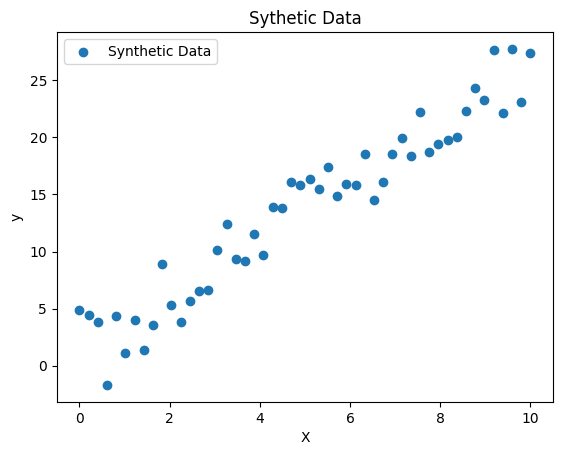

In [5]:
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt 

torch.manual_seed(42)

X = torch.linspace(0,10,50).unsqueeze(1)
true_w = 2.5 
true_b = 1.0 

y = true_w * X + true_b + torch.randn(X.size()) * 2

plt.scatter(X.numpy(), y.numpy(), label = 'Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Sythetic Data') 
plt.show()

In [12]:
class Bayesian_LinearRegression(nn.Module): 
    def __init__(self): 
        super(Bayesian_LinearRegression, self).__init__()
        # Initialize weights and bias as learnable parameters
        self.w = nn.Parameter(torch.randn(1, requires_grad=True)) # requires_grad=True is not required but it is good to have it for clarity
        self.b = nn.Parameter(torch.randn(1, requires_grad=True)) # requires_grad=True is not required but it is good to have it for clarity

    def forward(self, x): 
        return x * self.w + self.b
    
# Hyperparameters 
learning_rate = 0.001 
prior_var = 1.0 # variance of Gaussian prior
likelihood_var = 2.0 # variance of likelihood
num_epochs = 1000

In [13]:
model = Bayesian_LinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs): 
    optimizer.zero_grad()

    y_pred = model(X)
    # Negative log likelihood loss
    # Likelihood term: (y - y_pred)^2 / (2*likelihood_var)
    
    nll_loss = ((y- y_pred)**2).sum() / (2 * likelihood_var)

    # Prior term: w^2 / (2*prior_var) + b^2 / (2*prior_var)
    prior = (model.w**2 + model.b**2) / (2 * prior_var)

    loss = nll_loss + prior 
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, w: {model.w.item():.2f}, b: {model.b.item():.2f}")


Epoch 0, Loss: 1431.3929, w: 2.36, b: 0.41
Epoch 200, Loss: 57.7973, w: 2.53, b: 0.96
Epoch 400, Loss: 57.7099, w: 2.51, b: 1.08
Epoch 600, Loss: 57.7052, w: 2.51, b: 1.11
Epoch 800, Loss: 57.7050, w: 2.51, b: 1.12
